## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 1.เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสเท่ากัน
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [1]:

import numpy as np
import matplotlib.pyplot as plt


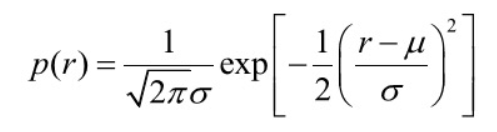

In [2]:
def gaussian_pdf(x, mean, std_dev):
    return ((1 / (np.sqrt(2 * np.pi) * std_dev))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

In [3]:
def posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    like_c1 = gaussian_pdf(x, mean1, std_dev1) * prior1
    like_c2 = gaussian_pdf(x, mean2, std_dev2) * prior2
    total = like_c1 + like_c2
    return like_c1 / total, like_c2 / total

In [4]:
def decision_boundary(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    return (np.log(prior2/prior1) + 0.5*np.log(std_dev1**2/std_dev2**2) +
            0.5*(x-mean1)**2/std_dev1**2 - 0.5*(x-mean2)**2/std_dev2**2)

In [5]:
def plot_graphs(x, likelihood1, likelihood2, post1, post2, db_x, class1, class2, prior1, prior2, title_prefix):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, likelihood1, label='Class 1', color='blue')
    plt.plot(x, likelihood2, label='Class 2', color='red', linestyle='dashed')
    plt.axvline(db_x, color='g', linestyle='-', label='Decision Boundary')
    if class1 is not None and class2 is not None:
        plt.scatter(class1, [0]*len(class1), color='blue', marker='o', label='Class 1 Data')
        plt.scatter(class2, [0]*len(class2), color='red', marker='s', label='Class 2 Data')
    plt.title(f'{title_prefix}\nLikelihoods and Decision Boundary\nPrior 1 = {prior1:.2f}, Prior 2 = {prior2:.2f}')
    plt.xlabel('x')
    plt.ylabel('Likelihood')
    plt.ylim(0, max(max(likelihood1), max(likelihood2)) * 1.1)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, post1, label='Class 1', color='blue')
    plt.plot(x, post2, label='Class 2', color='red', linestyle='dashed')
    plt.axvline(db_x, color='g', linestyle='-', label='Decision Boundary')
    if class1 is not None and class2 is not None:
        plt.scatter(class1, [0]*len(class1), color='blue', marker='o', label='Class 1 Data')
        plt.scatter(class2, [0]*len(class2), color='red', marker='s', label='Class 2 Data')
    plt.title(f'{title_prefix}\nPosterior Probabilities')
    plt.xlabel('x')
    plt.ylabel('Posterior Probability')
    plt.ylim(0, 1.1)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [6]:
def calculate_priors(class1, class2):
    total_samples = len(class1) + len(class2)
    prior1 = len(class1) / total_samples
    prior2 = len(class2) / total_samples
    return prior1, prior2

ข้อมูลแบบกำหนดเอง

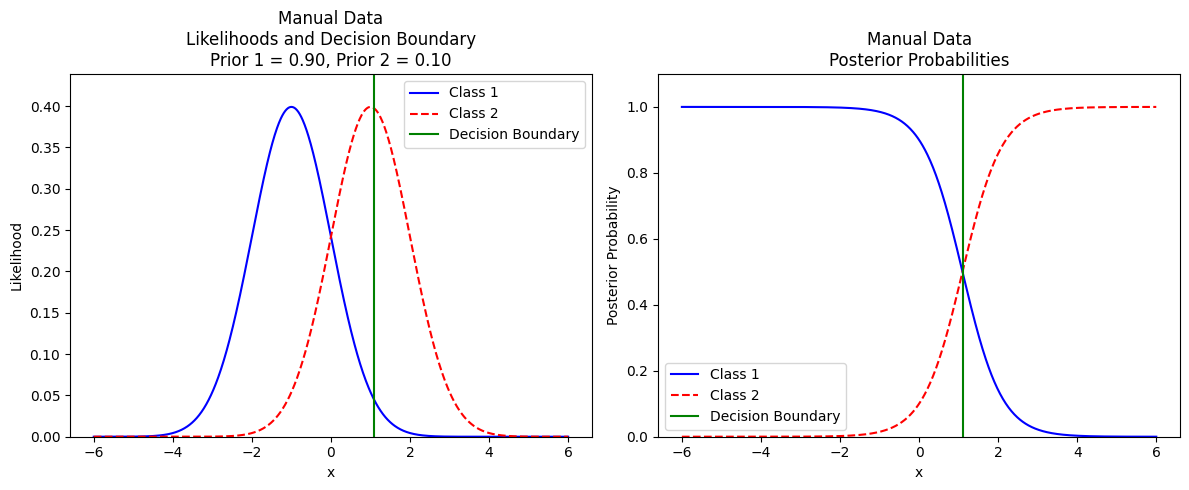

In [10]:
mean1_manual, std_dev1_manual = -1, 1
mean2_manual, std_dev2_manual = 1, 1
prior1_manual, prior2_manual = 0.9, 0.1  # Equal priors

x_manual = np.linspace(-6, 6, 1000)

likelihood1_manual = gaussian_pdf(x_manual, mean1_manual, std_dev1_manual)
likelihood2_manual = gaussian_pdf(x_manual, mean2_manual, std_dev2_manual)
post1_manual, post2_manual = posterior(x_manual, mean1_manual, mean2_manual, std_dev1_manual, std_dev2_manual, prior1_manual, prior2_manual)

db_manual = decision_boundary(x_manual, mean1_manual, mean2_manual, std_dev1_manual, std_dev2_manual, prior1_manual, prior2_manual)
db_x_manual = x_manual[np.argmin(np.abs(db_manual))]

plot_graphs(x_manual, likelihood1_manual, likelihood2_manual, post1_manual, post2_manual, db_x_manual, None, None, prior1_manual, prior2_manual, "Manual Data")

ข้อมูลแบบสุ่ม

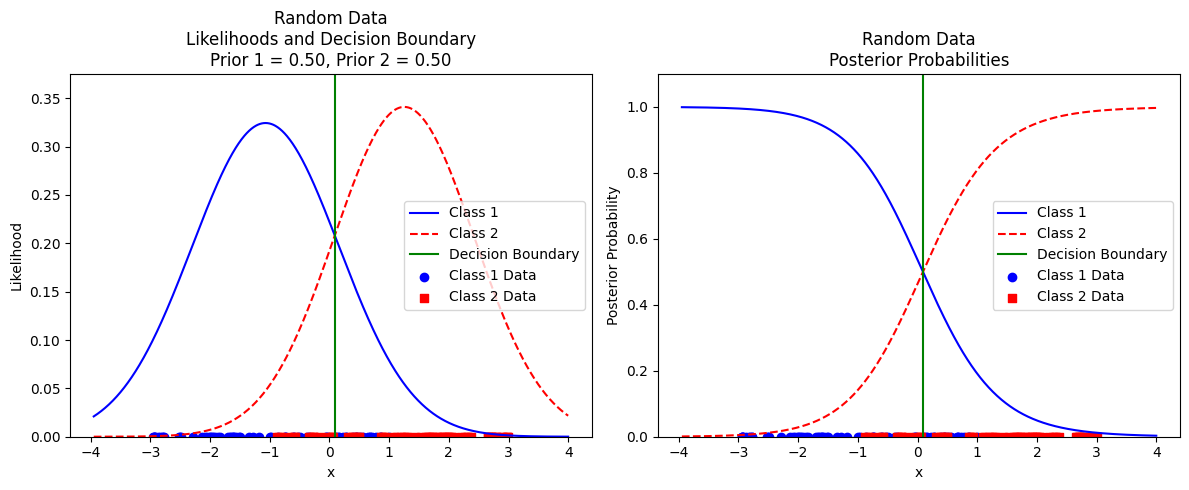

In [8]:
np.random.seed()
class1_random = np.random.uniform(-3, 1, 70)
class2_random = np.random.uniform(-1, 3, 70)

mean1_random, std_dev1_random = np.mean(class1_random), np.std(class1_random)
mean2_random, std_dev2_random = np.mean(class2_random), np.std(class2_random)

# Calculate priors based on class sizes
prior1_random, prior2_random = calculate_priors(class1_random, class2_random)

x_random = np.linspace(min(min(class1_random), min(class2_random)) - 1, max(max(class1_random), max(class2_random)) + 1, 1000)

likelihood1_random = gaussian_pdf(x_random, mean1_random, std_dev1_random)
likelihood2_random = gaussian_pdf(x_random, mean2_random, std_dev2_random)
post1_random, post2_random = posterior(x_random, mean1_random, mean2_random, std_dev1_random, std_dev2_random, prior1_random, prior2_random)

db_random = decision_boundary(x_random, mean1_random, mean2_random, std_dev1_random, std_dev2_random, prior1_random, prior2_random)
db_x_random = x_random[np.argmin(np.abs(db_random))]

plot_graphs(x_random, likelihood1_random, likelihood2_random, post1_random, post2_random, db_x_random, class1_random, class2_random, prior1_random, prior2_random, "Random Data")

รายละเอียดข้อมูลของทั้ง 2 กราฟ

In [9]:
print("Manual Data:")
print(f"Class 1: mean = {mean1_manual:.2f}, std_dev = {std_dev1_manual:.2f}")
print(f"Class 2: mean = {mean2_manual:.2f}, std_dev = {std_dev2_manual:.2f}")
print(f"Priors: Class 1 = {prior1_manual:.2f}, Class 2 = {prior2_manual:.2f}")
print(f"Decision Boundary: x = {db_x_manual:.2f}")

print("\nRandom Data:")
print(f"Class 1: mean = {mean1_random:.2f}, std_dev = {std_dev1_random:.2f}")
print(f"Class 2: mean = {mean2_random:.2f}, std_dev = {std_dev2_random:.2f}")
print(f"Priors: Class 1 = {prior1_random:.2f}, Class 2 = {prior2_random:.2f}")
print(f"Decision Boundary: x = {db_x_random:.2f}")

Manual Data:
Class 1: mean = -1.00, std_dev = 1.00
Class 2: mean = 1.00, std_dev = 1.00
Priors: Class 1 = 0.50, Class 2 = 0.50
Decision Boundary: x = -0.01

Random Data:
Class 1: mean = -1.07, std_dev = 1.23
Class 2: mean = 1.25, std_dev = 1.17
Priors: Class 1 = 0.50, Class 2 = 0.50
Decision Boundary: x = 0.09
